Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
    


In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

with open('daily_engagement.csv', 'rb') as de:
    reader = unicodecsv.DictReader(de)
    daily_engagement = list(reader)


with open('project_submissions.csv', 'rb') as ps:
    reader = unicodecsv.DictReader(ps)
    project_submissions = list(reader)

print(daily_engagement[0])

print('\n')

print(project_submissions[0])

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}


{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [6]:
# from quiz answer

def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return(unique_students)

In [13]:
unique_enrolled_students = get_unique_students(enrollments)
unique_engaged_students = get_unique_students(daily_engagement)
unique_project_submitters = get_unique_students(project_submissions)


In [9]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def key_count(table, key):
    all_accounts = {}
    for row in table:
        row_account_key = row[key]
        all_accounts[row_account_key] = all_accounts.get(row_account_key, 0)
    return(len(all_accounts))
        
print('length of project submissions list')
print(len(project_submissions))
print('number of unique keys / students')
print(key_count(project_submissions, 'account_key'))
#un


print('\n')
print('length of daily engagement list')
print(len(daily_engagement))
print('number of unique keys / students')
print(key_count(daily_engagement, 'acct'))

print('\n')
print('length of enrollments list')
print(len(enrollments))
print('number of unique keys / students')
print(key_count(enrollments, 'account_key'))


length of project submissions list
3642
number of unique keys / students
743


length of daily engagement list
136240
number of unique keys / students
1237


length of enrollments list
1640
number of unique keys / students
1302


## Problems in the Data

In [15]:
#####################################
#                 3                 #
#####################################
#daily_engagement = hold

for row in daily_engagement:
    row['account_key'] = row.pop('acct')
    
    
print(daily_engagement[0]['account_key'])
## Rename the "acct" column in the daily_engagement table to "account_key".

KeyError: 'acct'

In [14]:
for i in daily_engagement[0:1000]:
    if i['account_key'] != '0': 
        print(i)
        break

{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 9.640248, u'projects_completed': 0, 'account_key': u'1', u'utc_date': datetime.datetime(2015, 5, 6, 0, 0)}


In [16]:
print(daily_engagement[0]['account_key'])

0


## Missing Engagement Records

In [24]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

#daily_accts = {}

#for row in daily_engagement:
#    daily_accts[row['account_key']] = daily_accts.get(row['account_key'], 0)

missing = 0    
for i, row in enumerate(enrollments):
    
    if row['account_key'] not in unique_engaged_students:
        print(row)
        missing += 1
    if missing == 3: break
    
    
#my note, understand break statements, keys and pop methods on dicts
print('\n')
#what else do you see?
### this is another way of doing #5
missing = 0    
for i, row in enumerate(enrollments):
    
    if (row['account_key'] not in unique_engaged_students) and (row['days_to_cancel'] != 0):
        print(row)
        missing += 1

        if missing == 3: break
            
#answer is 3

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 13, 0, 0), u'account_key': u'871', u'cancel_date': datetime.datetime(2014, 11, 13, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 15, 0, 0), u'account_key': u'1218', u'cancel_date': datetime.datetime(2014, 11, 15, 0, 0), u'days_to_cancel': 0}


{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015,

## Checking for More Problem Records

In [23]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

daily_accts = {}

for row in daily_engagement:
    daily_accts[row['account_key']] = daily_accts.get(row['account_key'], 0)

missing = 0    
for row in enrollments:
    student = row['account_key']
    if student not in daily_accts.keys():
        if row['join_date'].strftime('%y%m%d') != row['cancel_date'].strftime('%y%m%d'): #compare days, not time and date
            print(row)
            missing += 1
    if missing == 3: break

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}


AttributeError: 'NoneType' object has no attribute 'strftime'

## Tracking Down the Remaining Problems

In [25]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [27]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [28]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [37]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {} 

#note the use of singular and plural for loop variables

for enrollment in non_udacity_enrollments:
    if (enrollment['days_to_cancel'] == None) or (enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        date_joined = enrollment['join_date']

        #note trick here to keep earliest date
        if (account_key not in paid_students) or ( date_joined > paid_students[account_key]):
                                                paid_students[account_key] = date_joined
        
print len(paid_students)


995


## Getting Data from First Week

In [134]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0 #update in "debugging data analysis code

#people canceling and re-adding. 

In [215]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return(new_data)
    
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagements = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagements))
print(len(paid_submissions))


#replacing below with a function because of context on # 11


1293
134549
3618
6919


In [241]:
#part of #11 

for engagement in paid_engagements:
    if engagement['num_courses_visited'] > 0:
        engagement['has_visited'] = 1
    else:
        engagement['has_visited'] = 0

In [242]:

paid_engagement_in_first_week = []

for engagement in paid_engagements:
    account_key = engagement['account_key']
    if account_key not in paid_students: continue
        #note importance of filtering paid students
        
    if within_one_week(paid_students[account_key], engagement['utc_date']):
        paid_engagement_in_first_week.append(engagement)
    #if i > 3: break
        
#print(paid_engagement_in_first_week)
print(len(paid_engagement_in_first_week))


6919


## Exploring Student Engagement

In [243]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [244]:
for i, n in enumerate(engagement_by_account.items()):
    if i < 3:
        print n

(u'1200', [{u'lessons_completed': 1, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 114.853432, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 4, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 43.4168625, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 5, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 187.776832833, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 6, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 150.081577333, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 7, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 191.61088, u'projects_completed': 0, 'account_

In [245]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    #if account_key == '108': print('help me')
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [246]:
for i,  n in enumerate(total_minutes_by_account.items()):
    if n[0] == '108' : print n

(u'108', 164.27089083347)


In [247]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes) 
#rough understanding of what this means...

print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

#what does this mean to you?  

#think of this IF if were a bell curve

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


In [248]:
#updated

import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes) 
#rough understanding of what this means...

print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

#what does this mean to you?  

#think of this IF if were a bell curve

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [249]:
#####################################
#                 8                 #
#####################################
for row in total_minutes_by_account:
    if total_minutes_by_account[row] > 10000: 
        oddrow = row
        print oddrow

#print(engagement_by_account[oddrow])

for row in engagement_by_account[oddrow]:
    #print('\n')
    print(row['account_key'],row['utc_date'])
## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

(u'108', datetime.datetime(2015, 4, 20, 0, 0))
(u'108', datetime.datetime(2015, 4, 21, 0, 0))
(u'108', datetime.datetime(2015, 4, 22, 0, 0))
(u'108', datetime.datetime(2015, 4, 23, 0, 0))
(u'108', datetime.datetime(2015, 4, 24, 0, 0))
(u'108', datetime.datetime(2015, 4, 25, 0, 0))
(u'108', datetime.datetime(2015, 4, 26, 0, 0))


## Lessons Completed in First Week

In [250]:
#my way to explore data

for i, n in enumerate(engagement_by_account.items()): 
    if i > 1: break
    #print(n)


In [251]:
#####################################
#                 9                 #
#####################################

#class asks to turn scripts into three functions (only seen in solution)

def group_data(data, key):
# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
    grouped_dict = defaultdict(list)
    for row in data:
        account_key = row[key]
        grouped_dict[account_key].append(row)
    return(grouped_dict)

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

def sum_up(grouped_data, thing):
    D = {}
    for key, row in grouped_data.items():
        total = 0
        for item in row:
            total += item[thing]
        D[key] = total
    return(D)

completed_lessons = sum_up(engagement_by_account, 'lessons_completed')

def describe_data(data):
    #return mean, sd, min, max
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data) 
    #rough understanding of what this means...
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    
total_values = completed_lessons.values()
describe_data(total_values)
## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


In [252]:
engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')
completed_lessons = sum_up(engagement_by_account, 'lessons_completed')
total_values = completed_lessons.values()
describe_data(total_values)

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [254]:
######################################
#                 10                 #
######################################
engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')
completed_lessons = sum_up(engagement_by_account, 'has_visited')
total_values = completed_lessons.values()
describe_data(total_values)

## days each student visits the classroom during the first week.

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [282]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passed = set()
##!!!!!READ TABLE DESCRIPTIONS
for submission in paid_submissions:
    if (submission['lesson_key'] in subway_project_lesson_keys):
        if submission['assigned_rating'] in ['PASSED', 'DISTINCTION']:
            passed.add(submission['account_key'])
    #break

#print(passed)

passing_engagement = []
non_passing_engagement = []

for engagement in paid_engagement_in_first_week:
    if engagement['account_key'] in passed:
        passing_engagement.append(engagement)
    else: 
        non_passing_engagement.append(engagement)
        
print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the Two Student Groups

In [287]:
######################################
#                 12                 #
######################################

grouped = group_data(passing_engagement, 'account_key')
summed = sum_up(grouped, 'total_minutes_visited')
totals = summed.values()
describe_data(totals)

print('\n')

grouped = group_data(non_passing_engagement, 'account_key')
summed = sum_up(grouped, 'total_minutes_visited')
totals = summed.values()
describe_data(totals)

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


In [307]:
t = (394 - 333) / (np.sqrt(448**2/4527 + 269**2/2392 ))
print(t)

7.09110596337


## Making Histograms

(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

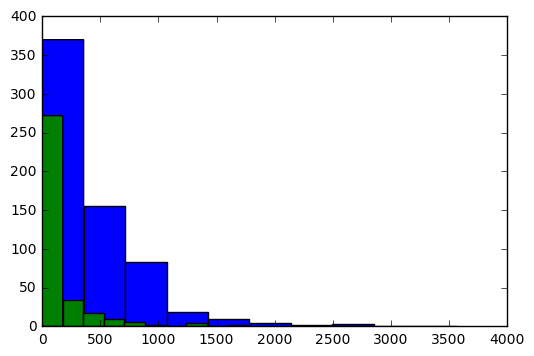

In [291]:
######################################
#                 13                 #
######################################
data = [1, 2, 1, 3, 3, 1, 4, 2]

%matplotlib inline
import matplotlib.pyplot as plt

#plt.hist(data)
## Make histograms of the three metrics we looked at earlier for both
grouped = group_data(passing_engagement, 'account_key')
summed = sum_up(grouped, 'total_minutes_visited')
totals = summed.values()

plt.hist(totals)

grouped = group_data(non_passing_engagement, 'account_key')
summed = sum_up(grouped, 'total_minutes_visited')
totals = summed.values()

plt.hist(totals)


#grouped = group_data(non_passing_engagement, 'account_key')
#summed = sum_up(grouped, 'total_minutes_visited')
#totals = summed.values()


## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

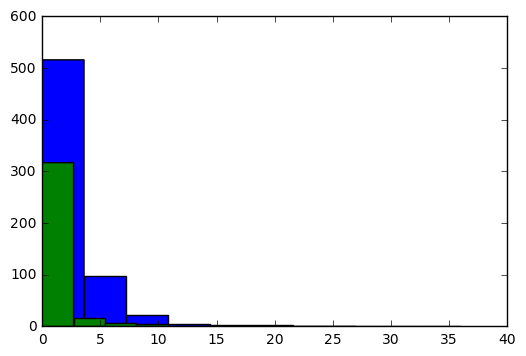

In [292]:
grouped = group_data(passing_engagement, 'account_key')
summed = sum_up(grouped, 'lessons_completed')
totals = summed.values()

plt.hist(totals)

grouped = group_data(non_passing_engagement, 'account_key')
summed = sum_up(grouped, 'lessons_completed')
totals = summed.values()

plt.hist(totals)



(array([ 97.,  90.,  56.,   0.,  41.,  15.,   0.,  24.,  17.,   8.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

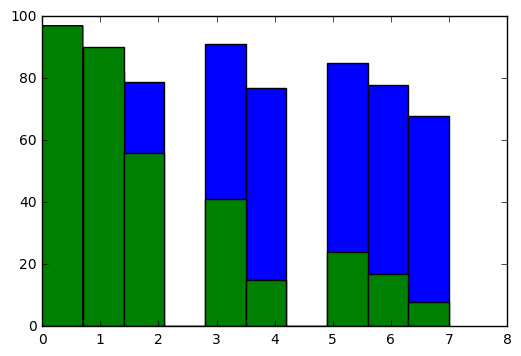

In [301]:
grouped = group_data(passing_engagement, 'account_key')
summed = sum_up(grouped, 'has_visited')
totals = summed.values()
plt.hist(totals)

grouped = group_data(non_passing_engagement, 'account_key')
summed = sum_up(grouped, 'has_visited')
totals = summed.values()
plt.hist(totals)




## Improving Plots and Sharing Findings

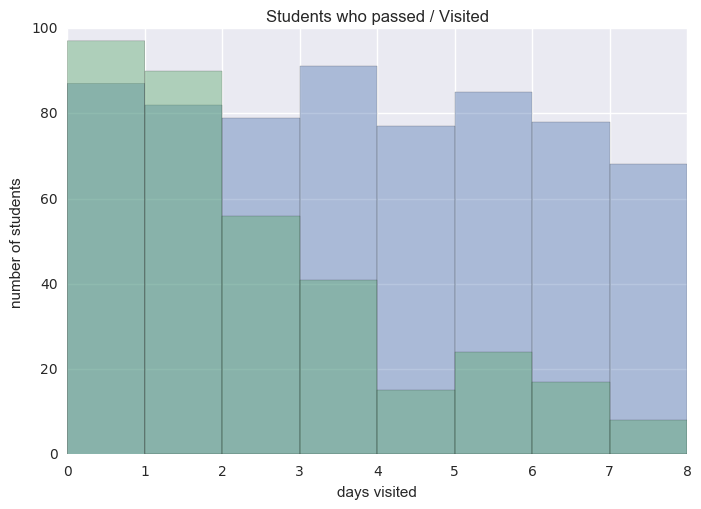

In [322]:
######################################
#                 14                 #
######################################
import seaborn as sns

bingroup = [0,1,2,3,4,5,6,7,8]

pgrouped = group_data(passing_engagement, 'account_key')
psummed = sum_up(pgrouped, 'has_visited')
ptotals = psummed.values()
plt.hist(ptotals, bins=bingroup, alpha=.4)

ngrouped = group_data(non_passing_engagement, 'account_key')
nsummed = sum_up(ngrouped, 'has_visited')
ntotals = nsummed.values()
plt.hist(ntotals, bins=bingroup, alpha=.4)

plt.xlabel('days visited')
plt.ylabel('number of students')
plt.title('Students who passed / Visited')


## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.